### Covid State and County Watch

I put this set of plots together to get a rough idea about the spread of SARS-COV-2 virus during the onset of the pandemic in 2020.  With the recent increase in cases due to the spread of the Delta variant, I have updated the graphs to streamline the process of getting a quick look.  

In [9]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import math

### Data
Data for all graphs is retrieved from the Unified real-time environmental-epidemiological data for multiscale modeling of the COVID-19 pandemic (Badr, et. al 2021) repository on github.

In [3]:
coronacases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
coronadeaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

#### US Deaths, cumulative and daily plots

These graphs were put together quickly, sticking with default parameters; only the plot size was changed.  The default colors for the the second/daily plot were changed to better show the 7-day average.

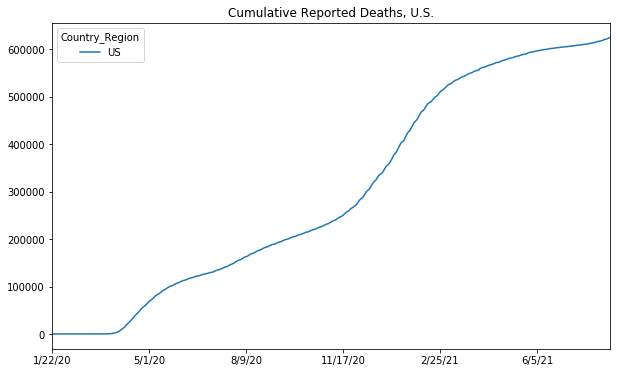

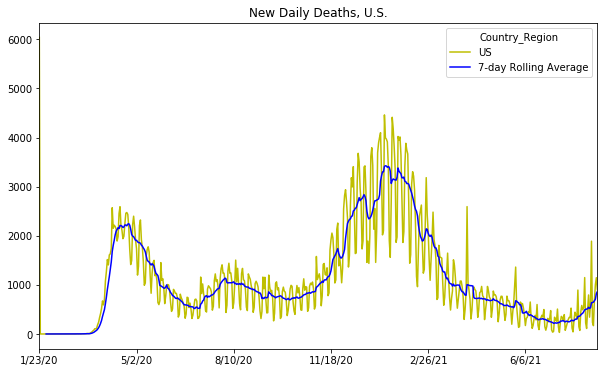

In [4]:
us_deaths = coronadeaths.groupby(by=['Country_Region']).sum()
us_deaths.drop(columns=['UID','FIPS','code3', 'Lat','Long_', 'Population'], inplace=True)
us_deaths.T.plot(figsize = (10,6),
                title="Cumulative Reported Deaths, U.S.")
us_new_deaths = us_deaths.diff(axis = 1)
# R provides value-lag(value) in the plm package (panel linear models?)

us_new_deaths.drop(columns = ['1/22/20'], inplace = True)

dates = list(us_new_deaths.columns)
new_data_dict = {}
rolling_sum = us_new_deaths[dates[0]]
rolling_sum.name = 'rollingsum'

for date_index in range(1,len(dates)):
    #print(dates[date_index])
    rolling_sum += us_new_deaths[dates[date_index]]
    if date_index > 6:
        rolling_sum -= us_new_deaths[dates[date_index - 7]]
        new_data_dict[dates[date_index]]=rolling_sum/7.
us_newdeaths_rolling = pd.DataFrame(new_data_dict)
us_newdeaths_rolling.rename(index={'US': '7-day Rolling Average'}, inplace=True)
us_new_deaths_plus = us_new_deaths.append(us_newdeaths_rolling, sort=False)
us_new_deaths_plus.T.plot(figsize = (10,6),
                          color=['y', 'b'],
                          title="New Daily Deaths, U.S.")

#### State Cases 7-day Rolling Average

States are in alphabetic order, five states per plot.

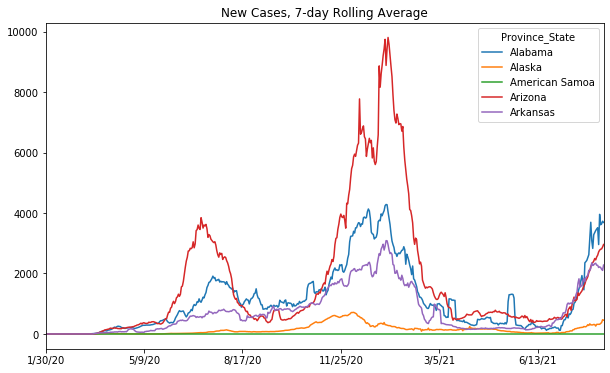

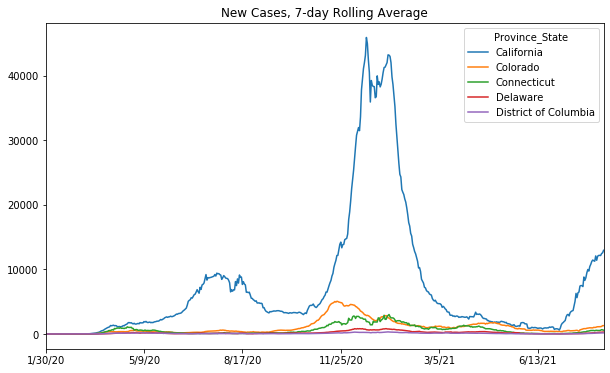

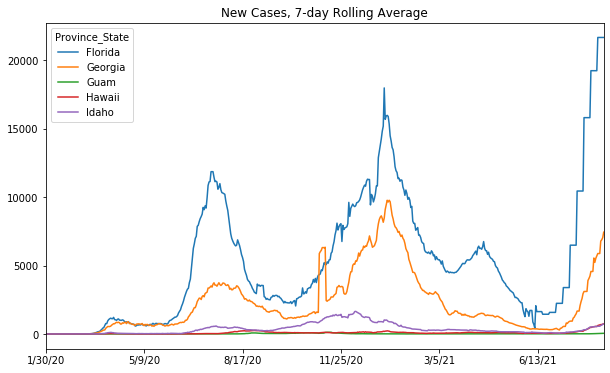

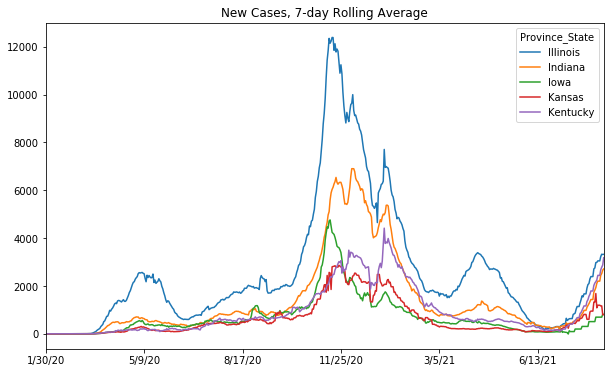

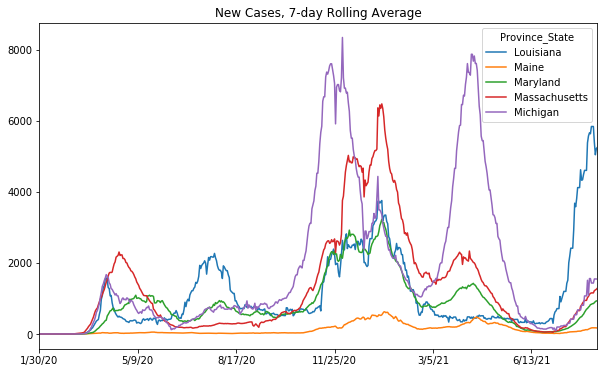

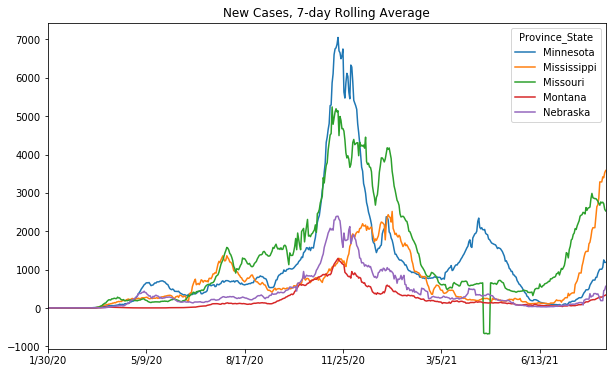

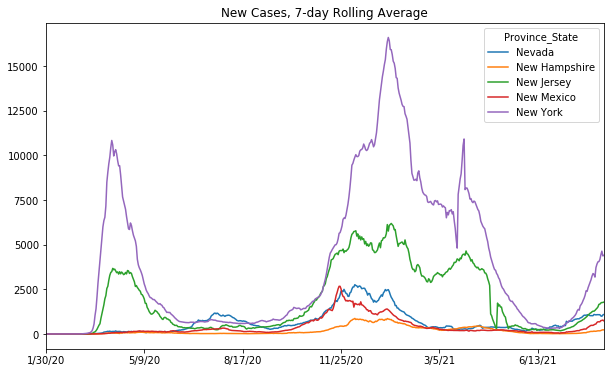

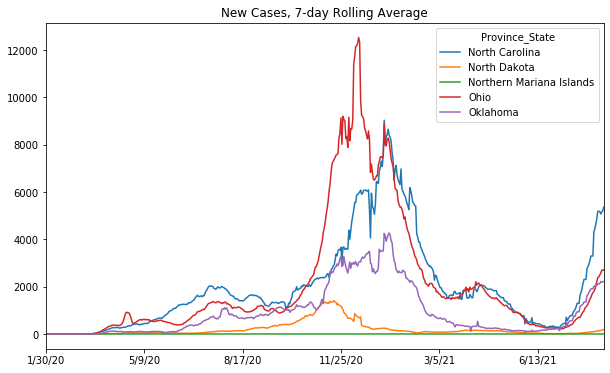

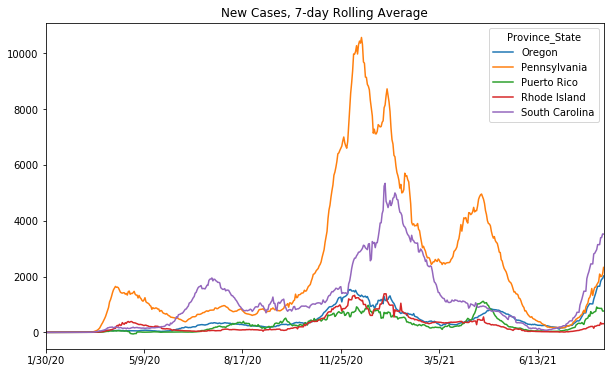

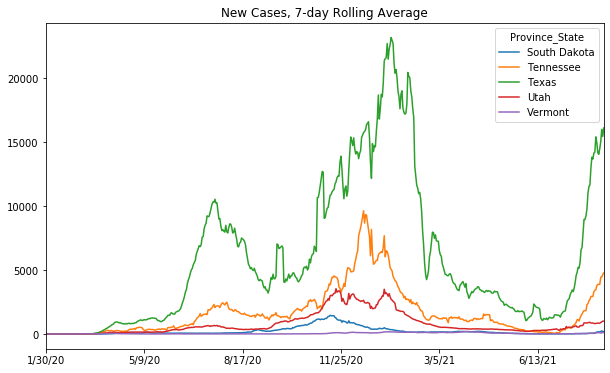

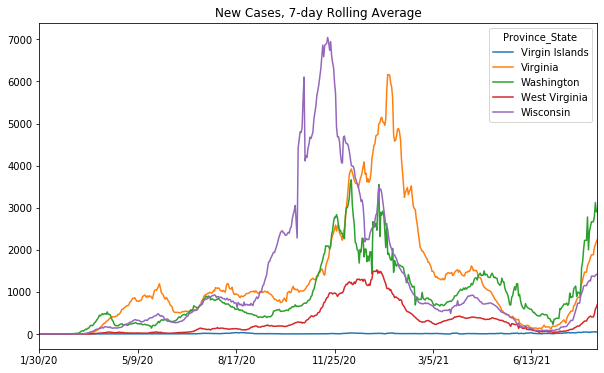

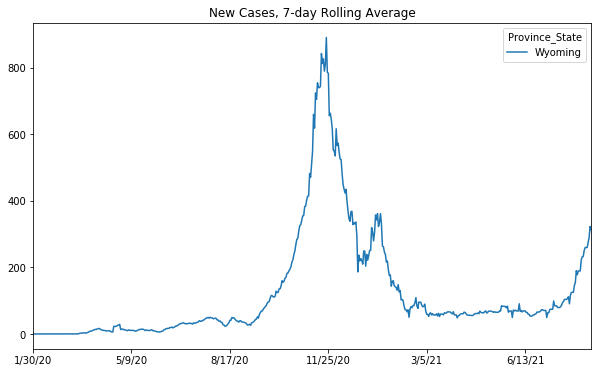

In [5]:
state_data = coronacases.groupby(by=['Province_State']).sum()
state_data.drop(columns=['UID','FIPS','code3', 'Lat','Long_'], inplace=True)
state_data.drop(index=['Diamond Princess', 'Grand Princess'], inplace=True)
state_new_cases = state_data.diff(axis = 1)
state_new_cases.drop(columns = ['1/22/20'], inplace = True)
state_new_cases
dates = list(state_new_cases.columns)
new_data_dict = {}
rolling_sum = state_new_cases[dates[0]]
rolling_sum.name = 'rollingsum'
for date_index in range(1,len(dates)):
    #print(dates[date_index])
    rolling_sum += state_new_cases[dates[date_index]]
    if date_index > 6:
        rolling_sum -= state_new_cases[dates[date_index - 7]]
        new_data_dict[dates[date_index]]=rolling_sum/7.
#for item in new_data_dict:
    #print(item)
    #print(new_data_dict[item])
state_newcases_rolling = pd.DataFrame(new_data_dict)

for plot in range(0,12):
    begin, end = 5*plot,min(len(dates),5*(1+plot))
    state_newcases_rolling[begin:end].T.plot(figsize = (10,6),
                                              title="New Cases, 7-day Rolling Average")

#### State by State Reported Deaths from Covid-19

Data should follow reported cases with a 1-3 week time lag.  

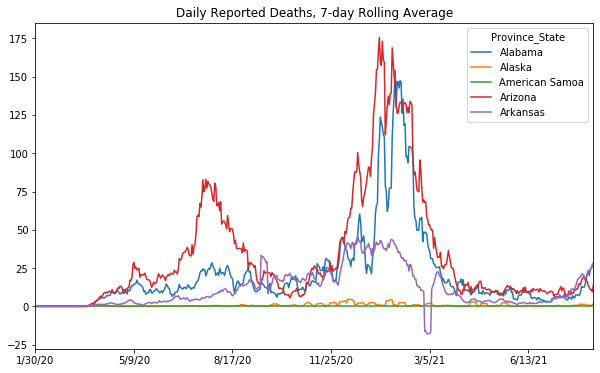

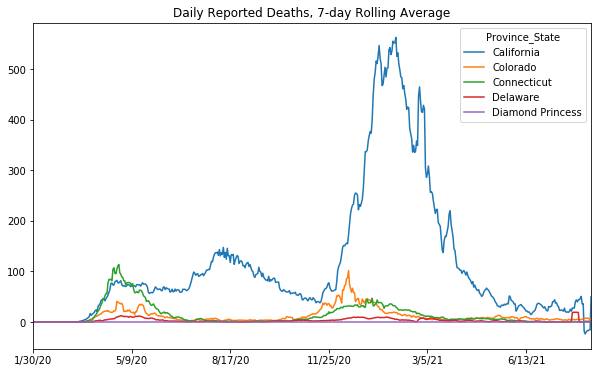

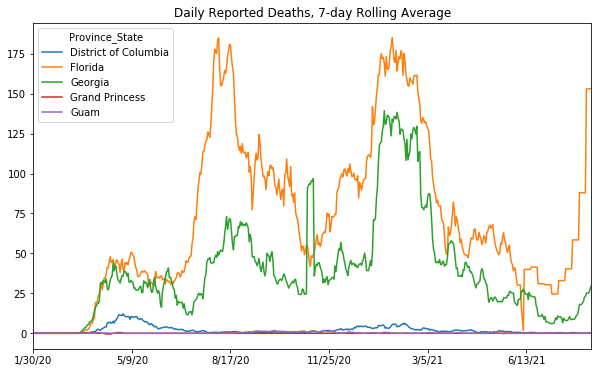

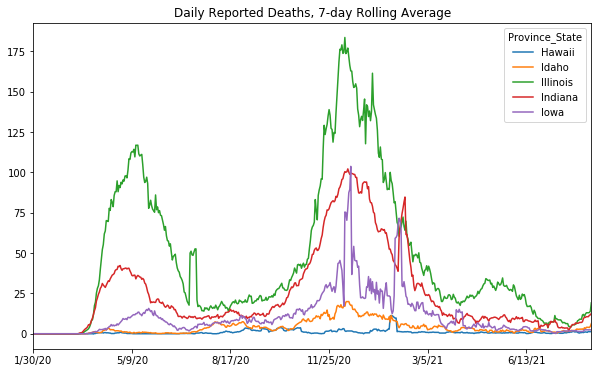

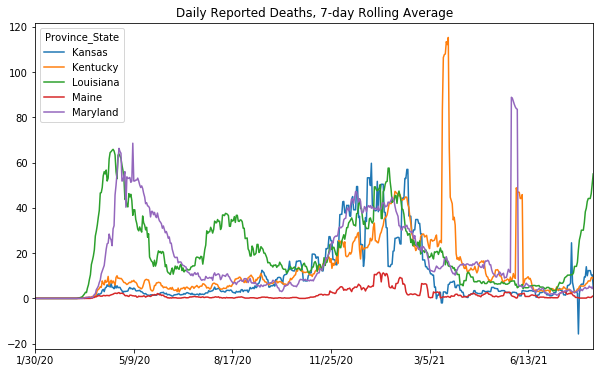

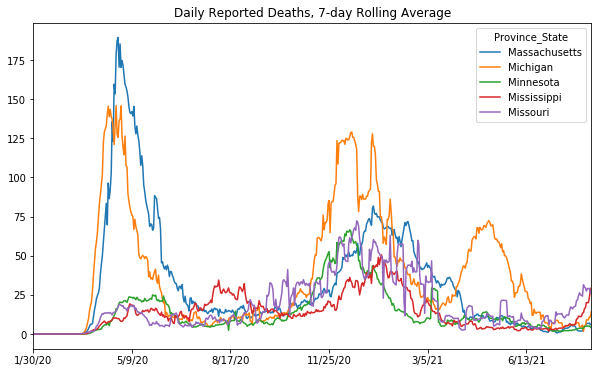

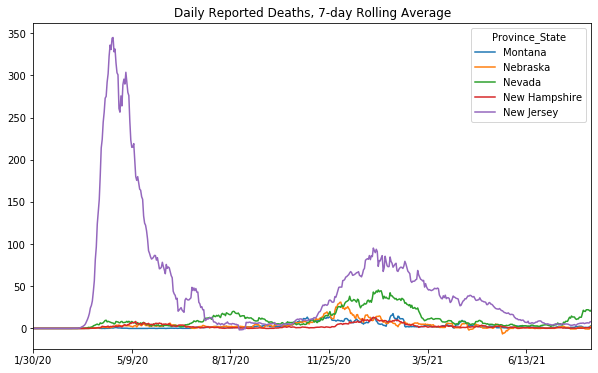

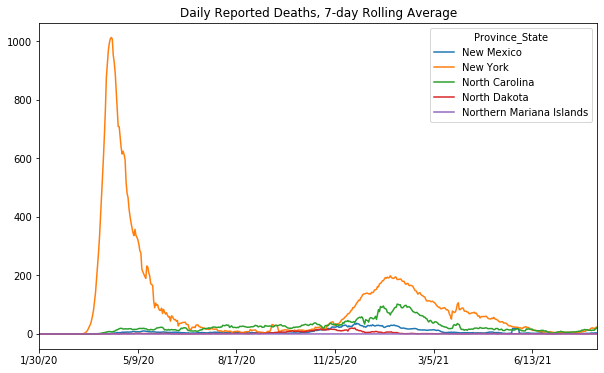

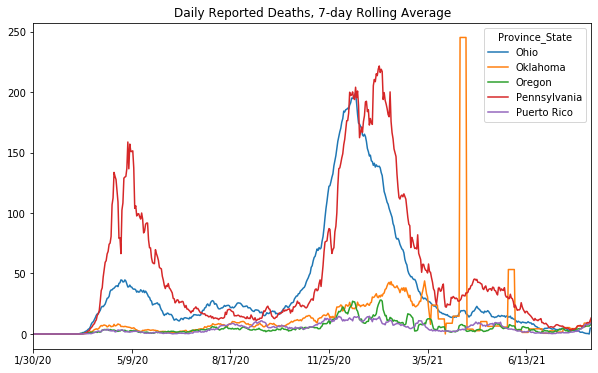

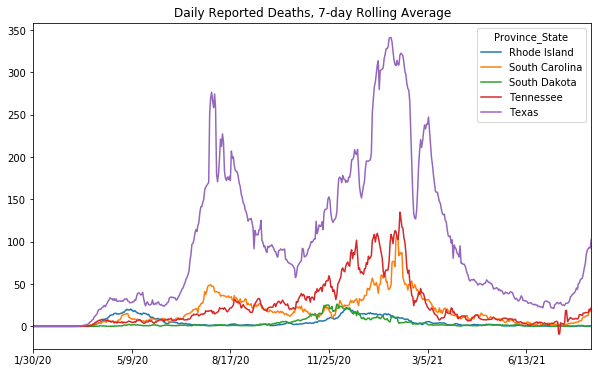

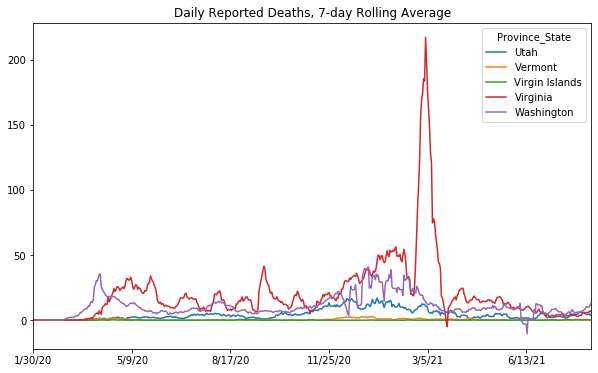

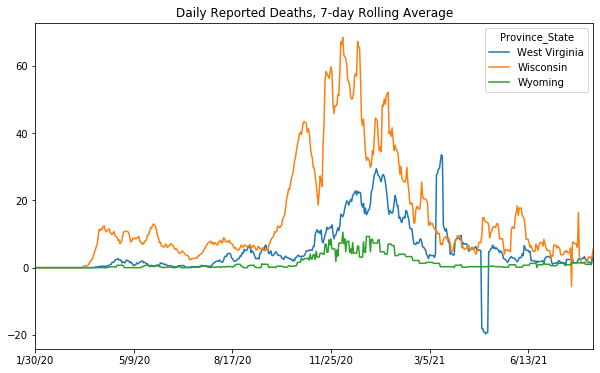

In [39]:
state_deaths = coronadeaths.groupby(by=['Province_State']).sum()
#state_pops = state_deaths['Population']
state_deaths.drop(columns=['UID','FIPS','code3', 'Lat','Long_','Population'], inplace=True)

state_new_deaths = state_deaths.diff(axis = 1)
state_new_deaths.drop(columns = ['1/22/20'], inplace = True)

new_data_dict2 = {}
rolling_sum2 = state_new_deaths[dates[0]]
rolling_sum2.name = 'rollingsum2'
for date_index in range(1,len(dates)):
    #print(dates[date_index])
    rolling_sum2 += state_new_deaths[dates[date_index]]
    if date_index > 6:
        rolling_sum2 -= state_new_deaths[dates[date_index - 7]]
        new_data_dict2[dates[date_index]]=rolling_sum2/7.
#for item in new_data_dict:
    #print(item)
    #print(new_data_dict[item])
state_new_deaths_rolling = pd.DataFrame(new_data_dict2)
columns = list(state_new_deaths_rolling.columns)
for plot in range(0,12):
    begin, end = 5*plot,min(len(columns),5*(1+plot))
    state_new_deaths_rolling[begin:end].T.plot(figsize = (10,6),
                                              title="Daily Reported Deaths, 7-day Rolling Average")

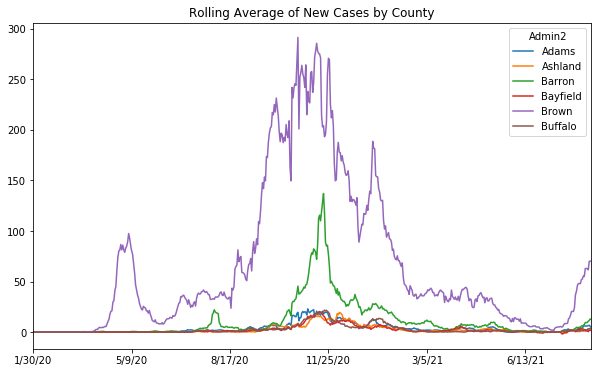

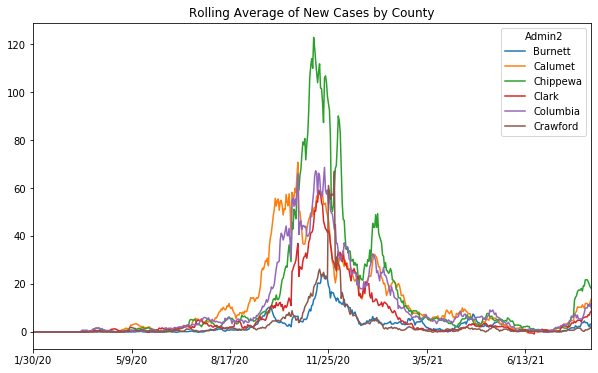

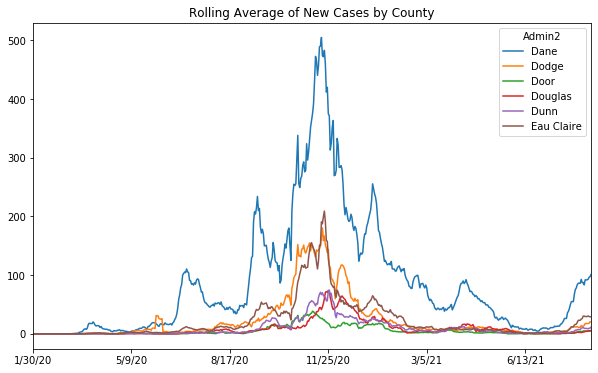

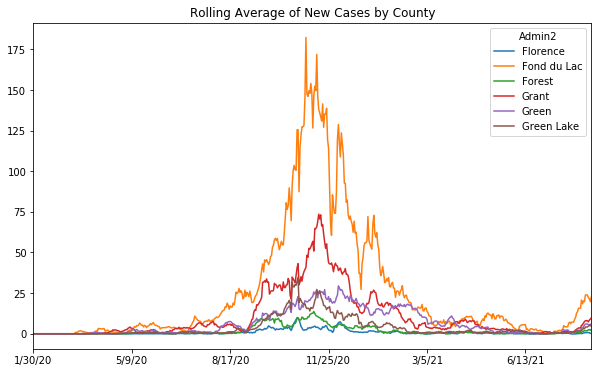

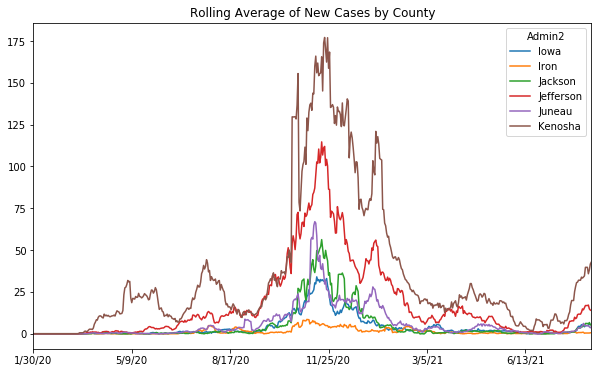

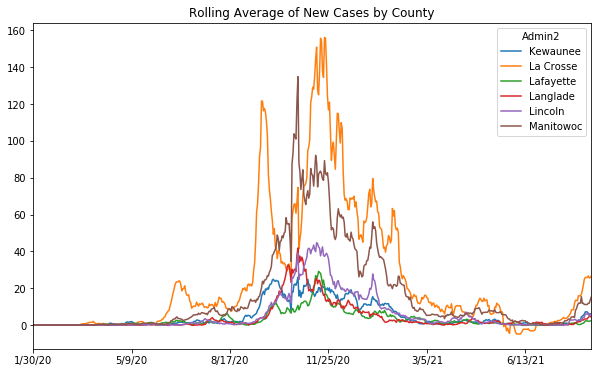

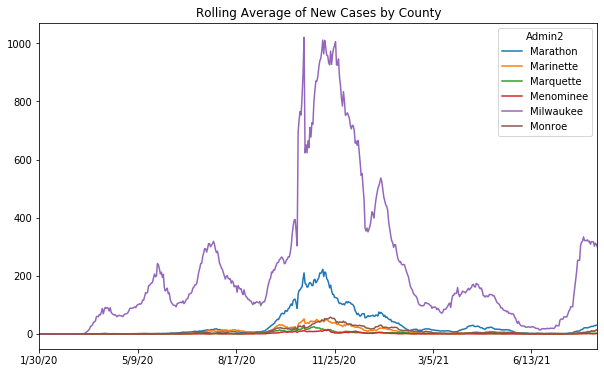

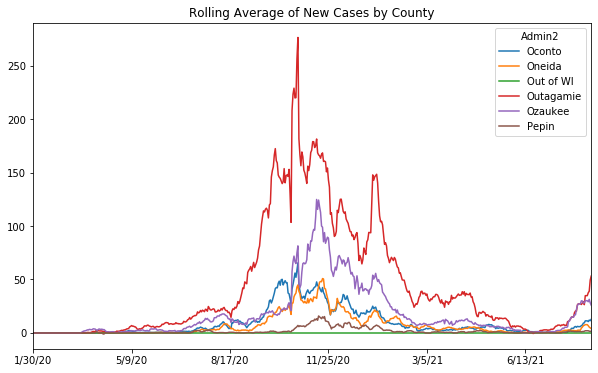

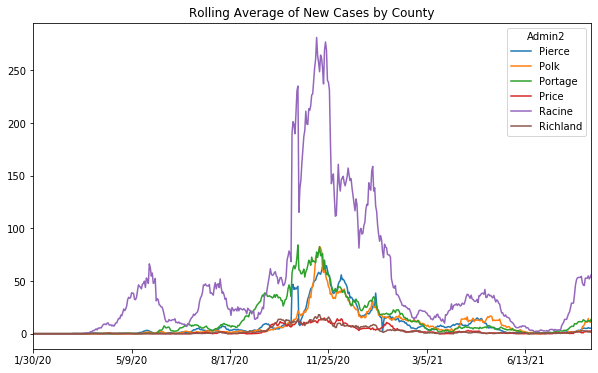

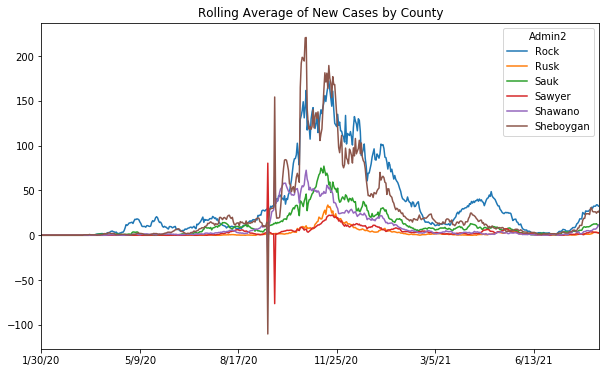

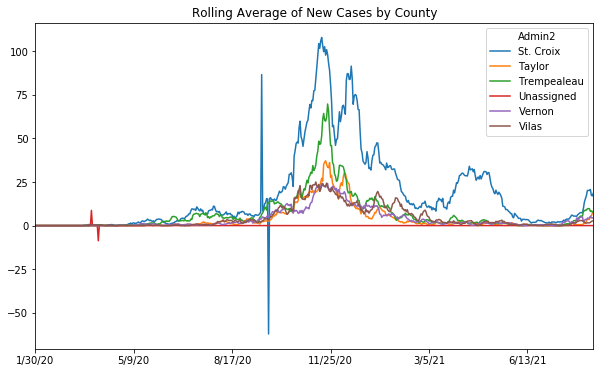

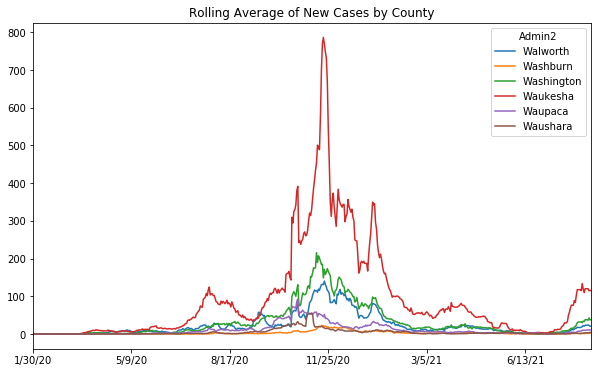

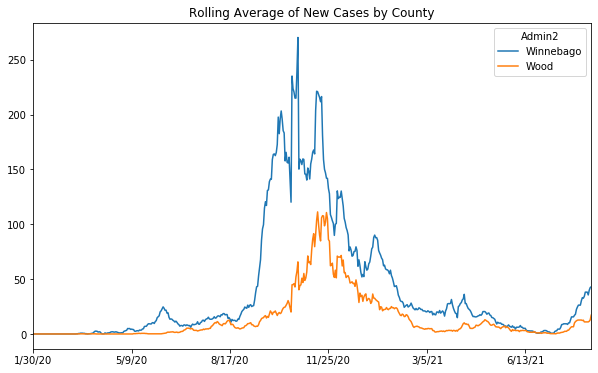

In [22]:
# change my_state see county data from another state

my_state = "Wisconsin"

my_state_coronacases = coronacases[coronacases['Province_State']==my_state]
#print(ma_state_coronacases.head())
my_county_data = my_state_coronacases.drop(columns = ['UID', 'iso2', 'iso3' , 'code3','FIPS', 'Province_State', 
                                    'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
my_county_data.set_index('Admin2', inplace=True)
#ma_county_data.T.plot(figsize = (10,10))
my_county_case_data_new = my_county_data.diff(axis = 1)
my_county_case_data_new.drop(columns = ['1/22/20'])
#ma_county_case_data_new.T.plot(figsize = (10,10))
new_data_dict3 = {}
rolling_sum3 = my_county_case_data_new[dates[0]]
rolling_sum3.name = 'rollingsum2'
for date_index in range(1,len(dates)):
    #print(dates[date_index])
    rolling_sum3 += my_county_case_data_new[dates[date_index]]
    if date_index > 6:
        rolling_sum3 -= my_county_case_data_new[dates[date_index - 7]]
        new_data_dict3[dates[date_index]]=rolling_sum3/7.
#for item in new_data_dict:
    #print(item)
    #print(new_data_dict[item])
county_new_cases_rolling = pd.DataFrame(new_data_dict3)
counties = len(county_new_cases_rolling)
#county_new_cases_rolling.T.plot(figsize = (10,10))
columns = list(county_new_cases_rolling.columns)
for plot in range(0,(math.ceil(counties/6.0))):
    begin, end = 6*plot,min(len(columns),6*(1+plot))
    county_new_cases_rolling[begin:end].T.plot(figsize = (10,6),
                                              title="Rolling Average of New Cases by County")

### References

Badr, H. S., B. F. Zaitchik, G. H. Kerr, N. Nguyen, Y. Chen, P. Hinson, J. M. Colston, M. N. Kosek, E. Dong, H. Du, M. Marshall, K. Nixon, A. Mohegh, D. L. Goldberg, S. C. Anenberg, and L. M. Gardner, **2021**: Unified real-time environmental-epidemiological data for multiscale modeling of the COVID-19 pandemic. *MedRxiv*, 2021.05.05.21256712.